In [21]:
import numpy as np
np.random.seed(1337) #随机种子
from keras.models import Sequential
from keras.layers import Dense  #全连接层
import matplotlib.pyplot as plt # 可视化

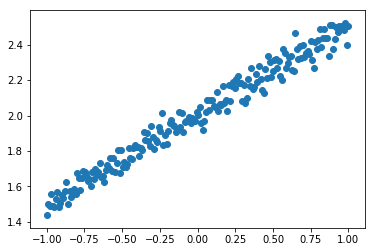

In [18]:
#模拟数据
X = np.linspace(-1,1,200)
np.random.shuffle(X) # 重新晒洗
Y = 0.5 * X + 2 + np.random.normal(0,0.05,(200,))
#显示数据
plt.scatter(X,Y)
plt.show()

# 数据分割
X_train,Y_train = X[:160],Y[:160] #训练集
X_test,Y_test = X[160:],Y[160:]   #测试集

In [8]:
#建立模型
model = Sequential()
model.add(Dense(input_dim=1,units=1))

In [9]:
# 激活模型
#参数中，误差使用的是mse均方误差，优化器用sgd随机梯度下降
model.compile(loss='mse',optimizer='sgd')

In [14]:
# 训练模型
print("Training -----------------")
for i in range(301):
    #损失值
    cost = model.train_on_batch(X_train, Y_train)
    if i % 100 == 0:
        print('train cost: ',cost)

Training -----------------
train cost:  0.029215971
train cost:  0.009077812
train cost:  0.0038419242
train cost:  0.002479373


In [15]:
# 检验模型
print('\nTesting---------------')
cost = model.evaluate(X_test,Y_test,batch_size=40)
print('test cost: ',cost)

#获取weights 和 bias
W,b = model.layers[0].get_weights()
print('Weights= ',W,'bias= ',b)


Testing---------------
40/40 [==============================] - 0s 43us/step
test cost:  0.0028899062890559435
Weights=  [[0.4622911]] bias=  [1.9978206]


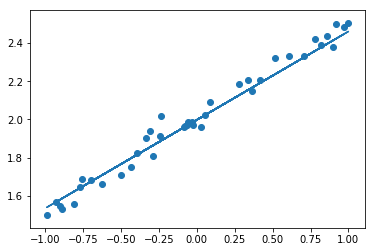

In [19]:
# 可视化结果
Y_pre = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pre)
plt.show()